- MSDS 604 Final Project 
- Surbhi Prasad, Vishwas Prabhu, David Lyu

# #1 Code By Surbhi Prasad

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
import pmdarima as pm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [51]:
#SARIMAX function can fit all the models in the family
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import sklearn.metrics as skmetrics
import warnings
from statsmodels.tsa.stattools import arma_order_select_ic
from tqdm import tqdm #A tqdm progress bar shows you how much time has elapsed and the estimated time remaining for the iterable
#import pmdarima as pm
warnings.filterwarnings("ignore")

In [52]:
df_zill_cal = read_csv('zillow-carlifornia.csv', header=0, index_col=0, parse_dates=True,squeeze=True)

In [53]:
test = read_csv('test.csv', header=0, index_col=0, parse_dates=True,squeeze=True)

In [54]:
test.head()

Month
2016-01-31    476250
2016-02-29    466000
2016-03-31    485000
2016-04-30    501000
2016-05-31    501000
Name: Median House Price, dtype: int64

In [55]:
df_zill_cal.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
Date,,,
2008-02-29,470000.0,5.29,6.3
2008-03-31,441000.0,5.44,6.2
2008-04-30,460000.0,5.42,6.4
2008-05-31,429000.0,5.47,6.3
2008-06-30,437500.0,5.60,6.2


In [56]:
df_zill_cal.info()  
## No nulls

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2008-02-29 to 2016-12-31
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MedianSoldPrice_AllHomes.California  95 non-null     float64
 1   MedianMortageRate                    107 non-null    float64
 2   UnemploymentRate                     107 non-null    float64
dtypes: float64(3)
memory usage: 3.3 KB


In [57]:
df_zill_cal.shape

(107, 3)

In [58]:
df_zill_cal.describe()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
count,95.000000,107.000000,107.000000
mean,399105.263158,4.186542,6.823364
std,45971.423521,0.636049,1.183979
min,335000.000000,3.290000,4.700000
25%,360125.000000,3.780000,6.100000
50%,375000.000000,4.060000,7.000000
75%,440000.000000,4.430000,7.650000
max,489000.000000,6.030000,9.100000


In [59]:
df_zill_cal=df_zill_cal.reset_index()

In [60]:
df_zill_cal.tail()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
102,2016-08-31,NaN,3.46,4.8
103,2016-09-30,NaN,3.42,5.0
104,2016-10-31,NaN,3.36,5.0
105,2016-11-30,NaN,3.47,4.8
106,2016-12-31,NaN,4.07,4.7


In [61]:
df_zill_cal["Date"].max(),df_zill_cal["Date"].min()

(Timestamp('2016-12-31 00:00:00'), Timestamp('2008-02-29 00:00:00'))

In [62]:
df_zill_cal["Date"]=pd.to_datetime(df_zill_cal["Date"])

In [63]:
df_zill_cal["Date"].dtype

dtype('<M8[ns]')

In [64]:
## This is a time series monthly data (with Date as last date of the month )from from 2008 to 2016 for 107 months. We will be using data upto 2015 for entire analysis and forecast sold price for 2016 as mentioned.
##There are no-nulls in data,. The houses prices vary from 335k to 489K. 

In [65]:
df_zill_cal["Date"]=pd.to_datetime(df_zill_cal['Date'])
df_zill_cal['yearmonth'] = df_zill_cal['Date'].map(lambda x: 100*x.year + x.month)
#df_zill_cal_train=df_zill_cal_train.set_index('Date')

In [66]:
df_zill_cal.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,yearmonth
0,2008-02-29,470000.0,5.29,6.3,200802
1,2008-03-31,441000.0,5.44,6.2,200803
2,2008-04-30,460000.0,5.42,6.4,200804
3,2008-05-31,429000.0,5.47,6.3,200805
4,2008-06-30,437500.0,5.60,6.2,200806


In [67]:
df_zill_cal_train=df_zill_cal[df_zill_cal["Date"]<='2015-12-31 00:00:00']
df_zill_cal_test=df_zill_cal[df_zill_cal["Date"]>'2015-12-31 00:00:00']

In [68]:
df_zill_cal_train.shape
df_zill_cal_train=df_zill_cal_train.set_index('Date')

In [69]:
df_zill_cal_train.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,yearmonth
Date,,,,
2008-02-29,470000.0,5.29,6.3,200802
2008-03-31,441000.0,5.44,6.2,200803
2008-04-30,460000.0,5.42,6.4,200804
2008-05-31,429000.0,5.47,6.3,200805
2008-06-30,437500.0,5.60,6.2,200806


In [70]:
#df_zill_cal_train=df_zill_cal_train.reset_index()

In [71]:
from matplotlib.dates import DateFormatter

In [72]:
df_zill_cal_train.tail()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,yearmonth
Date,,,,
2015-08-31,475000.0,3.95,5.2,201508
2015-09-30,470000.0,3.87,5.1,201509
2015-10-31,470000.0,3.80,5.0,201510
2015-11-30,485750.0,3.69,5.0,201511
2015-12-31,485000.0,3.89,5.1,201512


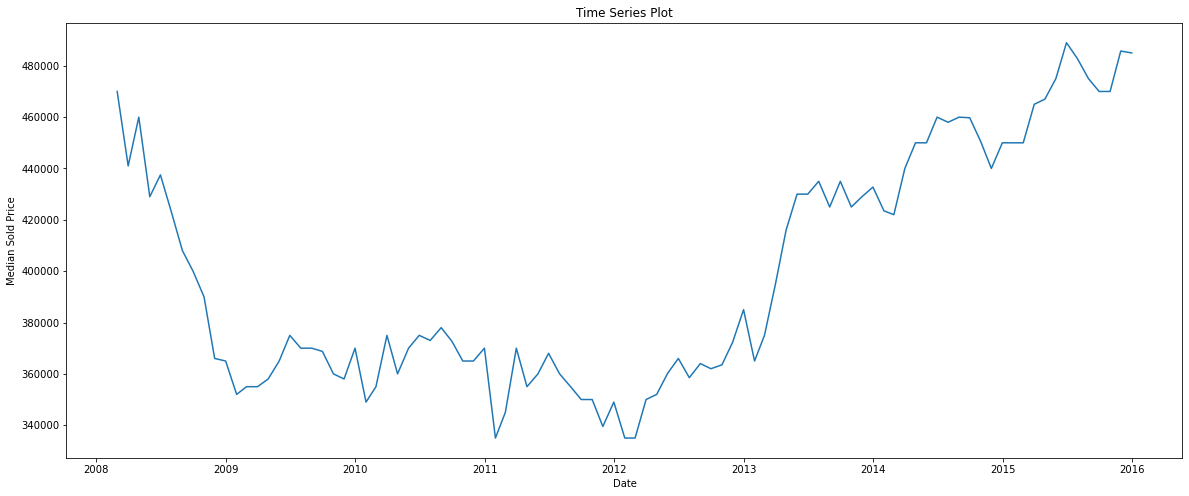

In [73]:
#Time Series Plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df_zill_cal_train.index.values,
       df_zill_cal_train['MedianSoldPrice_AllHomes.California'])

ax.set(xlabel="Date",
       ylabel="Median Sold Price",
       title="Time Series Plot")

#date_form = DateFormatter("%m/%d")
#ax.xaxis.set_major_formatter(date_form)

plt.show()
#pyplot.show()

In [74]:
## As we there is slight increase in prices , so there is base trend . We can't comment on seasonality by looking at plots though.

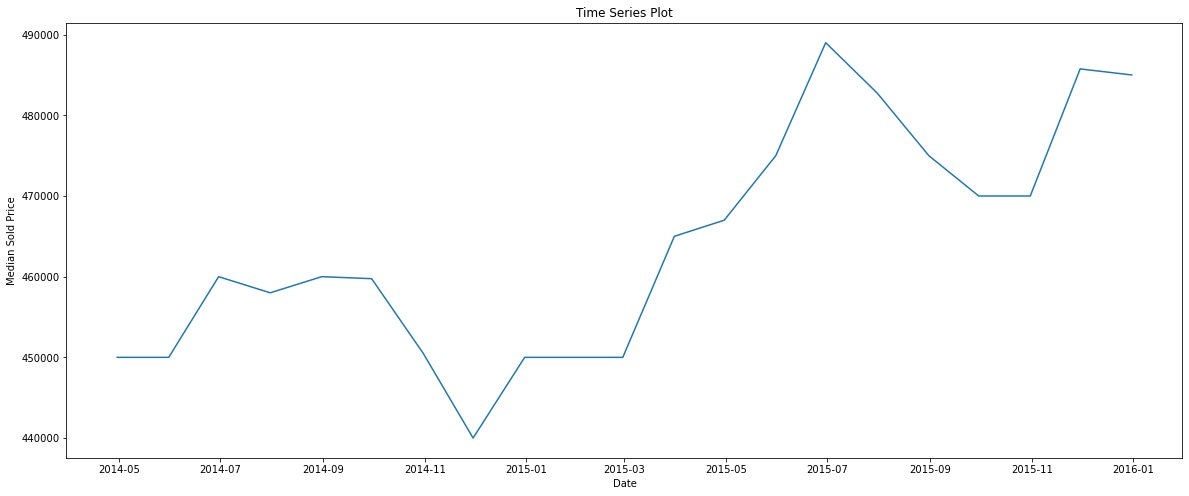

In [75]:
##recent plot

#Time Series Plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df_zill_cal_train.index.values[74:],
       df_zill_cal_train['MedianSoldPrice_AllHomes.California'][74:])

ax.set(xlabel="Date",
       ylabel="Median Sold Price",
       title="Time Series Plot")

#date_form = DateFormatter("%m/%d")
#ax.xaxis.set_major_formatter(date_form)

plt.show()
#pyplot.show()

In [76]:
# define all the functions we will need 

# trend and seasonal differencing
def diff(data, interval=1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return diff
#trend differencing once: interval=1
#trend differencing twice: d1=diff(data, interval=1); d2=diff(d1 interval=1)
#seasonal differencing: interval=m

#Define ADF test
#Perform from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


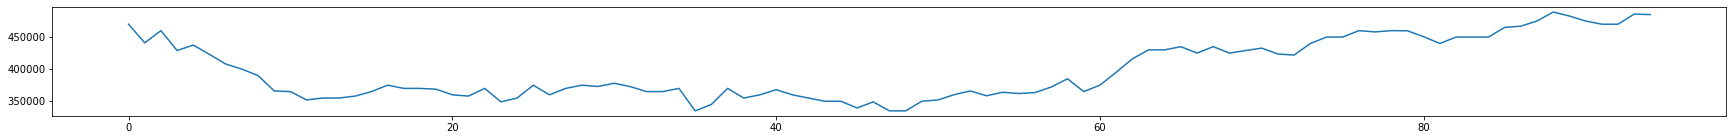

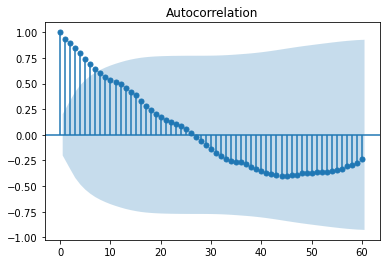

<function matplotlib.pyplot.show(close=None, block=None)>

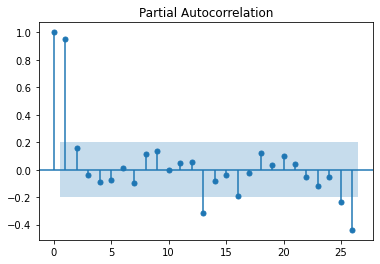

In [77]:
##ACF PLOT WITHOUT ANY DIFFERENCING
x=np.array(df_zill_cal_train['MedianSoldPrice_AllHomes.California'])
fig = plt.figure(figsize=(30, 2))
ax = fig.add_subplot(111)
ax.plot(x)
plt.show()
plot_acf(x,lags=60) 
plt.show()
plot_pacf(x,lags=26) 
plt.show

In [78]:
dftest = adfuller(x)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print (dfoutput)

Test Statistic   -0.058792
p-value           0.953391
dtype: float64


In [79]:
# The TS is not stationary. hence , let's dry differencing once mediansoldprice.

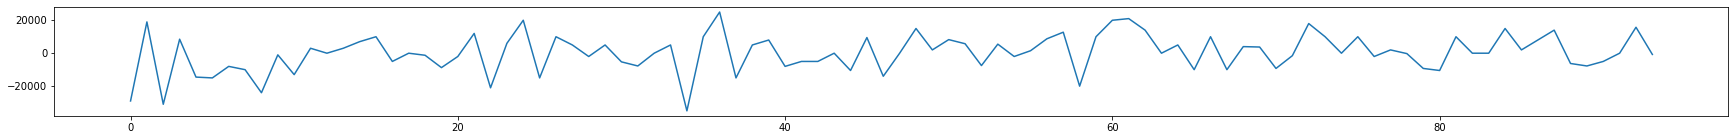

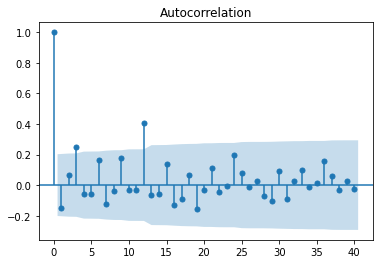

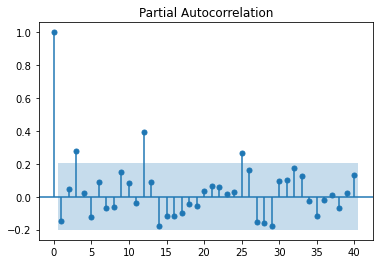

In [80]:
fig = plt.figure(figsize=(30, 2))
ax = fig.add_subplot(111)
d1 = diff(x, 1)
plt.plot(d1)
plot_acf(d1,lags=40) 
plt.show()
plot_pacf(d1,lags=40) 
plt.show()

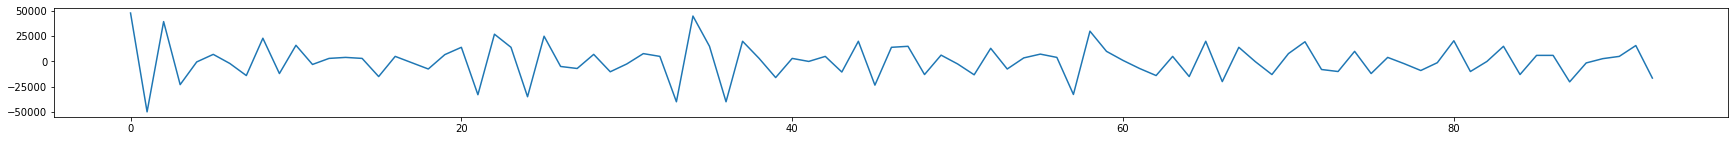

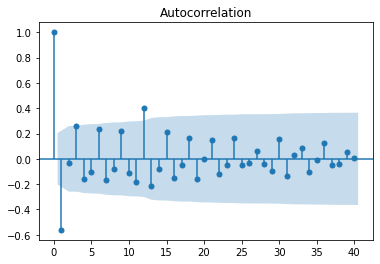

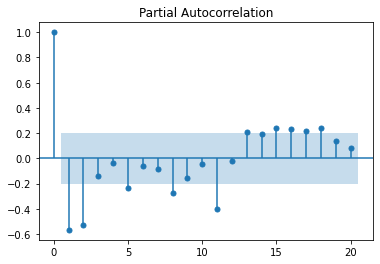

In [81]:
fig = plt.figure(figsize=(30, 2))
ax = fig.add_subplot(111)
d2 = diff(d1, 1)
plt.plot(d2)
plot_acf(d2,lags=40) 
plt.show()
plot_pacf(d2,lags=20) 
plt.show()

In [82]:
dftest = adfuller(d1)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print (dfoutput)

Test Statistic   -3.088139
p-value           0.027443
dtype: float64


In [83]:
# As we see now both correlation plots are shutting off now, Hence D=1 is suitable.We can also see slight peaks in correlation after every 12 lags. 
#But can't say with confidence, So we will try both seasonal_decompose function to decide itself in which we can see below seasonality repeats every year=12 months..



<Figure size 2160x144 with 0 Axes>

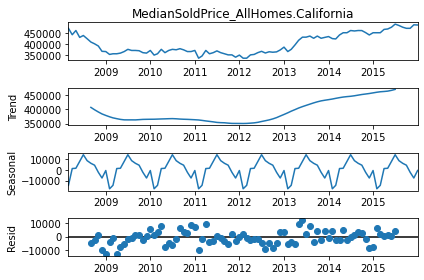

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = plt.figure(figsize=(30, 2))
result = seasonal_decompose(df_zill_cal_train['MedianSoldPrice_AllHomes.California'], model='additive')
fig = result.plot()

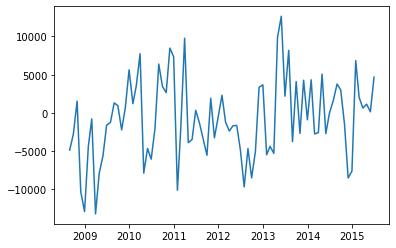

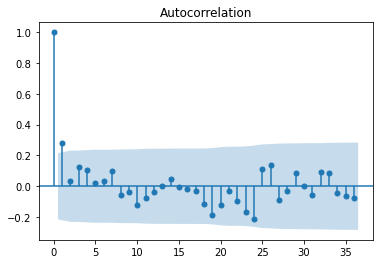

In [85]:

resid_val = result.resid[~np.isnan(result.resid)]
plt.plot(resid_val)
plot_acf(resid_val,lags=36) 
plt.show()

In [86]:
dftest = adfuller(resid_val)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print (dfoutput)

Test Statistic   -6.642682e+00
p-value           5.360619e-09
dtype: float64


<Figure size 2160x144 with 0 Axes>

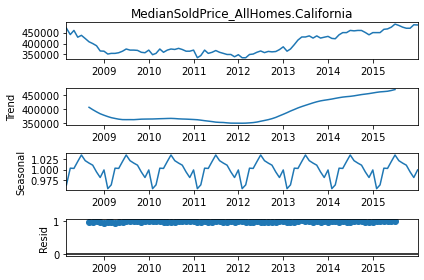

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = plt.figure(figsize=(30, 2))
result1 = seasonal_decompose(df_zill_cal_train['MedianSoldPrice_AllHomes.California'], model='multiplicative')
fig = result1.plot()

In [88]:
# Seasonality as we see is m=12 each year.
#So, in our candidates we have d=1 and seasonality i.e. m=12

In [89]:
##CREATING CV model for ETS models 

In [90]:
def evaluate_ets_model(X, trend_type, seasonal_type,damp,m):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    #print(np.mean(test))
    
    predictions = list()
    for t in range(len(test)):
        model = ExponentialSmoothing(X[:train_size+t], trend=trend_type, seasonal=seasonal_type, seasonal_periods=m,damped=damp) #rolling forward for one step at each time
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast())[0] #predict one step
        predictions.append(yhat) #store prediction
        # calculate out of sample error
    predictions = np.asarray(predictions).reshape(-1,)
    test = np.asanyarray(test).reshape(-1,)
    #mae = skmetrics.mean_absolute_error(test, predictions)
    rmse = np.sqrt(skmetrics.mean_squared_error(test, predictions))
    mape = np.mean(np.abs(test-predictions)/test)
    return rmse


In [91]:
##Trying all combinations of trend and seasonality and choose best model based on lowest mape.

In [92]:
trends=['additive', 'multiplicative', None]
seasons=['additive', 'multiplicative',None]

x=np.array(df_zill_cal_train['MedianSoldPrice_AllHomes.California'])
list_df=[]
for i in trends:
    for j in seasons:
        if i is None:
            print(i,j)
            rmse_1=evaluate_ets_model(x,i,j,False,12)
            list_df.append((i,j,rmse_1))
        else:
            print(i,j)
            rmse_1=evaluate_ets_model(x,i,j,True,12)
            list_df.append((i,j,rmse_1))

additive additive
additive multiplicative
additive None
multiplicative additive
multiplicative multiplicative
multiplicative None
None additive
None multiplicative
None None


In [93]:
pd.DataFrame(list_df,columns=['Trend','Seasons','RMSE'])

## The lowest rmse is for 

,Trend,Seasons,RMSE
0,additive,additive,11128.568418
1,additive,multiplicative,11649.135867
2,additive,None,9237.571125
3,multiplicative,additive,10716.045852
4,multiplicative,multiplicative,10417.362450
5,multiplicative,None,9066.875511
6,None,additive,10385.301142
7,None,multiplicative,17184.553430
8,None,None,8343.855861


In [94]:
##BEST MODEL: RMSE is 9.066876e+03 . Model: multiplicative Trend and no seasons

In [95]:
df_zill_cal_train.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,yearmonth
Date,,,,
2008-02-29,470000.0,5.29,6.3,200802
2008-03-31,441000.0,5.44,6.2,200803
2008-04-30,460000.0,5.42,6.4,200804
2008-05-31,429000.0,5.47,6.3,200805
2008-06-30,437500.0,5.60,6.2,200806


In [96]:
df_zill_cal_train=df_zill_cal_train[['MedianSoldPrice_AllHomes.California','UnemploymentRate','MedianMortageRate']]

In [97]:
##CHECK FEASIBILITY FOR VAR

In [98]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=11
test_stats = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test_stats][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



In [99]:
grangers_causation_matrix(df_zill_cal_train, variables = df_zill_cal_train.columns) 

,MedianSoldPrice_AllHomes.California_x,UnemploymentRate_x,MedianMortageRate_x
MedianSoldPrice_AllHomes.California_y,1.0000,0.0000,0.0
UnemploymentRate_y,0.0000,1.0000,0.0
MedianMortageRate_y,0.0619,0.1753,1.0


In [100]:
#The data is good fit for VAR as we can see from grangers test that each of the variables 
#has causation with other variables, p-value<0.05.

In [101]:
#VAR

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

train_soldprice = sc.fit_transform(np.array(df_zill_cal_train['MedianSoldPrice_AllHomes.California']).reshape(-1, 1) )
train_unemploymentrate = sc.fit_transform(np.array(df_zill_cal_train['UnemploymentRate']).reshape(-1, 1) )
#train_mortgage = sc.fit_transform(np.array(df_zill_cal_train['MedianMortageRate']).reshape(-1, 1) )
#test_soldprice = sc.transform(test.iloc[:,1:].values )

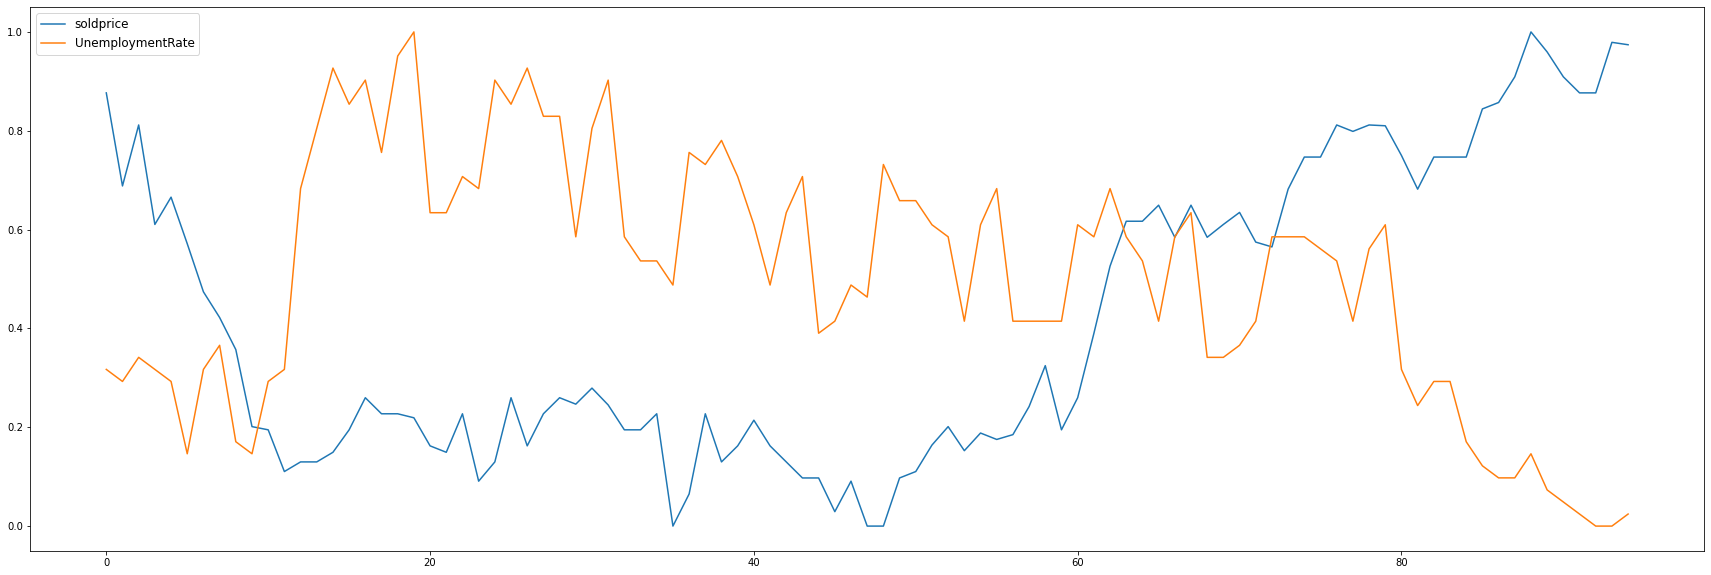

In [104]:
fig = plt.figure(figsize=(30, 10))
plt.plot(train_soldprice, label='soldprice')
plt.plot(train_unemploymentrate, label='UnemploymentRate')
# plt.plot(train_mortgage, label='MedianMortageRate')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [105]:
##We are going to use all variables in VAR as all looks to be interactive from time series plot. 
## Unemployment rate follows the opposite pattern with price while Mortgage Rate has similar trend with lag .

In [106]:
#Correlation
df_zill_cal_train['MedianSoldPrice_AllHomes.California'].corr(df_zill_cal_train['UnemploymentRate'])
##good correlation

-0.6463023469469523

In [107]:
#Correlation
df_zill_cal_train['MedianSoldPrice_AllHomes.California'].corr(df_zill_cal_train['MedianMortageRate'])

-0.00839711333132807

In [108]:
## We can include all three variable in VAR as all varies with trend.

In [109]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [110]:
df_zill_cal_train.head()

,MedianSoldPrice_AllHomes.California,UnemploymentRate,MedianMortageRate
Date,,,
2008-02-29,470000.0,6.3,5.29
2008-03-31,441000.0,6.2,5.44
2008-04-30,460000.0,6.4,5.42
2008-05-31,429000.0,6.3,5.47
2008-06-30,437500.0,6.2,5.60


In [111]:
df_zill_cal_train.shape

(95, 3)

In [112]:
#As we VAR needs stationarity of time series , we can check by ADF test for each variables.

In [113]:
from statsmodels.tsa.stattools import adfuller

In [114]:
#VAR assumes stationary, check it first
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(df_zill_cal_train['MedianSoldPrice_AllHomes.California'], autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:2], index=['Test Statistic','p-value'])
#dftest2 = adfuller(df_zill_cal_train['MedianMortageRate'], autolag='AIC')
#dfoutput2 = pd.Series(dftest2[0:2], index=['Test Statistic','p-value'])
dftest3 = adfuller(df_zill_cal_train['UnemploymentRate'], autolag='AIC')
dfoutput3 = pd.Series(dftest3[0:2], index=['Test Statistic','p-value'])
print (dfoutput1)
#print (dfoutput2)
print (dfoutput3)
#differencing required

Test Statistic   -0.058792
p-value           0.953391
dtype: float64
Test Statistic   -1.481369
p-value           0.542707
dtype: float64


In [115]:
## As we can see all three variables are non-stationary as p-value >0.05 . Hence, need to difference each one.

In [116]:
df_zill_cal_train_diff=df_zill_cal_train.diff().dropna()

In [117]:
df_zill_cal_train_diff.head()

,MedianSoldPrice_AllHomes.California,UnemploymentRate,MedianMortageRate
Date,,,
2008-03-31,-29000.0,-0.1,0.15
2008-04-30,19000.0,0.2,-0.02
2008-05-31,-31000.0,-0.1,0.05
2008-06-30,8500.0,-0.1,0.13
2008-07-31,-14500.0,-0.6,0.31


In [118]:
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(df_zill_cal_train_diff['MedianSoldPrice_AllHomes.California'], autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:2], index=['Test Statistic','p-value'])
#dftest2 = adfuller(df_zill_cal_train_diff['MedianMortageRate'], autolag='AIC')
#dfoutput2 = pd.Series(dftest2[0:2], index=['Test Statistic','p-value'])
dftest3 = adfuller(df_zill_cal_train_diff['UnemploymentRate'], autolag='AIC')
dfoutput3 = pd.Series(dftest3[0:2], index=['Test Statistic','p-value'])
print (dfoutput1)
#print (dfoutput2)
print (dfoutput3)

Test Statistic   -3.088139
p-value           0.027443
dtype: float64
Test Statistic   -1.782534
p-value           0.389167
dtype: float64


In [119]:
## As we can see aPrice and mortgage rate has become stationary but Unemployment hasn't. hence, will difference all variables once again to make it stationary

In [120]:
df_zill_cal_train_diff=df_zill_cal_train_diff.diff().dropna()
#df_zill_cal_train_diff['UnemploymentRate']=df_zill_cal_train_diff['UnemploymentRate'].diff()

In [121]:
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(df_zill_cal_train_diff['MedianSoldPrice_AllHomes.California'], autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:2], index=['Test Statistic','p-value'])
#dftest2 = adfuller(df_zill_cal_train_diff['MedianMortageRate'], autolag='AIC')
#dfoutput2 = pd.Series(dftest2[0:2], index=['Test Statistic','p-value'])
dftest3 = adfuller(df_zill_cal_train_diff['UnemploymentRate'], autolag='AIC')
dfoutput3 = pd.Series(dftest3[0:2], index=['Test Statistic','p-value'])
print (dfoutput1)
#print (dfoutput2)
print (dfoutput3)

Test Statistic   -7.390432e+00
p-value           8.027576e-11
dtype: float64
Test Statistic   -1.249864e+01
p-value           2.838908e-23
dtype: float64


In [122]:
df_zill_cal_train_diff.head()

,MedianSoldPrice_AllHomes.California,UnemploymentRate,MedianMortageRate
Date,,,
2008-04-30,48000.0,3.000000e-01,-0.17
2008-05-31,-50000.0,-3.000000e-01,0.07
2008-06-30,39500.0,8.881784e-16,0.08
2008-07-31,-23000.0,-5.000000e-01,0.18
2008-08-31,-500.0,1.300000e+00,-0.25


In [123]:
df_zill_cal_train_diff.shape

(93, 3)

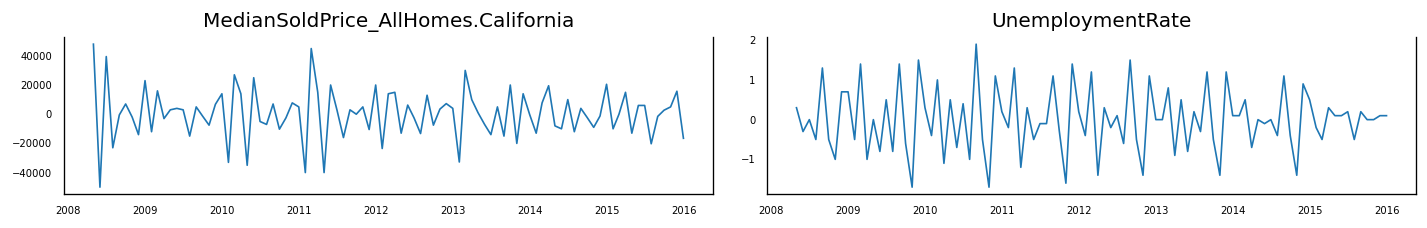

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(12,2))
for i, ax in enumerate(axes.flatten()):
    data = df_zill_cal_train_diff[df_zill_cal_train_diff.columns[i]]
    ax.plot(data, linewidth=1)
    # Decorations
    ax.set_title(df_zill_cal_train_diff.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [125]:
## As we can see all data looks stationary now

In [126]:
df_zill_cal_train_diff.head()

,MedianSoldPrice_AllHomes.California,UnemploymentRate,MedianMortageRate
Date,,,
2008-04-30,48000.0,3.000000e-01,-0.17
2008-05-31,-50000.0,-3.000000e-01,0.07
2008-06-30,39500.0,8.881784e-16,0.08
2008-07-31,-23000.0,-5.000000e-01,0.18
2008-08-31,-500.0,1.300000e+00,-0.25


In [127]:
model = VAR(df_zill_cal_train_diff)
for i in range(1,20):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  15.412898054319347
BIC :  15.741826999151831
FPE :  4940922.536809686
HQIC:  15.54565656348318 

Lag Order = 2
AIC :  14.803567439141831
BIC :  15.382996556030335
FPE :  2688465.162248247
HQIC:  15.037330999125787 

Lag Order = 3
AIC :  14.660484501612247
BIC :  15.493754391722335
FPE :  2334360.390557946
HQIC:  14.996507901878669 

Lag Order = 4
AIC :  14.356800952485147
BIC :  15.447327002143052
FPE :  1729105.6666228315
HQIC:  14.796360707978574 

Lag Order = 5
AIC :  14.13836769254193
BIC :  15.489642318620952
FPE :  1398111.481290304
HQIC:  14.682762320117451 

Lag Order = 6
AIC :  13.906450504559182
BIC :  15.522045478850117
FPE :  1118948.3666000052
HQIC:  14.557000781388048 

Lag Order = 7
AIC :  13.866964195429084
BIC :  15.750533050693404
FPE :  1090148.9604076208
HQIC:  14.625013396065036 

Lag Order = 8
AIC :  13.46673250094069
BIC :  15.622013021373322
FPE :  744474.6116372087
HQIC:  14.33364660930518 

Lag Order = 9
AIC :  13.449239006299106
BIC :  15

In [128]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,15.86,15.95,7.712e+06,15.90
1,15.22,15.60,4.088e+06,15.37
2,14.57,15.22*,2.120e+06,14.83
3,14.46,15.40,1.918e+06,14.84
4,14.08,15.31,1.324e+06,14.57
5,13.79,15.30,1.000e+06,14.39
6,13.57,15.36,8.090e+05,14.28
7,13.50,15.57,7.696e+05,14.32
8,13.21,15.56,5.945e+05,14.15
9,13.35,15.99,7.108e+05,14.40


In [129]:
#choosing maximu lags=11,12 as candidate models as lower aic/bic

In [130]:
# inverting transformation
def invert_transformation(dt_train, dt_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    dt_fc = dt_forecast.copy()
    columns = dt_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            dt_fc[str(col)+'_1d'] = (dt_train[col].iloc[-1]-dt_train[col].iloc[-2]) + dt_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        dt_fc[str(col)+'_forecast'] = dt_train[col].iloc[-1] + dt_fc[str(col)+'_1d'].cumsum()
    return dt_fc


In [131]:
df_zill_cal_train_diff.shape

(93, 3)

In [132]:
def evaluate_var_model(X, lag):
    train_size = int(len(X) * 0.8)
    train, test_1 = X[0:train_size], X[train_size:]
    
    
    predictions = list()
    for t in range(len(test_1)):
        model = VAR(X[:train_size+t]) #rolling forward for one step at each time
        model_fit = model.fit(maxlags=lag, ic='aic')
        yhat = model_fit.forecast(model_fit.y, steps=1)[0]
        dt_forecast = pd.DataFrame(yhat).T
        dt_forecast.columns=df_zill_cal_train.columns + '_1d'
        dt_results = invert_transformation(df_zill_cal_train, dt_forecast, second_diff=False)
        predictions.append(dt_results['MedianSoldPrice_AllHomes.California_forecast'][0])
        # calculate out of sample error
    predictions = np.asarray(predictions).reshape(-1,)
    #test = np.asanyarray(test).reshape(-1,)
    #mae = skmetrics.mean_absolute_error(test, predictions)
    new_test=df_zill_cal_train[train_size+2:]
    rmse = np.sqrt(skmetrics.mean_squared_error(new_test['MedianSoldPrice_AllHomes.California'], predictions))
    mape = np.mean(np.abs(new_test['MedianSoldPrice_AllHomes.California']-predictions)/new_test['MedianSoldPrice_AllHomes.California'])
    return rmse


In [133]:
evaluate_var_model(df_zill_cal_train_diff,11)

27803.07356675824

In [134]:
evaluate_var_model(df_zill_cal_train_diff,12)

29259.879883363225

In [135]:
##Final Model

#df_zill_cal_train['MedianSoldPrice_AllHomes.California']

In [136]:
model = ExponentialSmoothing(df_zill_cal_train["MedianSoldPrice_AllHomes.California"], trend="mul", seasonal=None, seasonal_periods=7,damped=True)
fit = model.fit()
pred = fit.forecast(12)

In [137]:
#df_zill_cal_test=df_zill_cal_test.set_index("Date")

In [138]:
ser_pred=pd.Series(pred)
ser_pred.index = df_zill_cal_test.index

In [139]:
ser_pred

95     487464.444502
96     489864.297222
97     492251.789389
98     494626.868606
99     496989.485115
100    499339.591755
101    501677.143931
102    504002.099578
103    506314.419119
104    508614.065433
105    510901.003818
106    513175.201954
dtype: float64

In [140]:
rmse = np.sqrt(skmetrics.mean_squared_error(test, ser_pred))

In [141]:
rmse

9813.02758042555

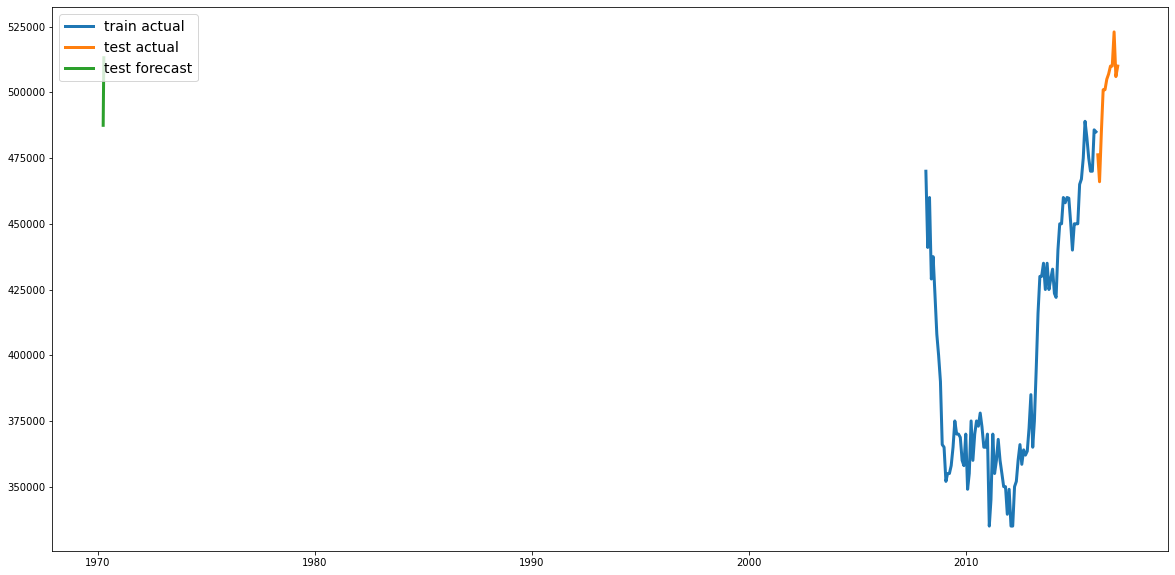

In [142]:
fig = plt.figure(figsize=(20, 10))
plt.plot(df_zill_cal_train["MedianSoldPrice_AllHomes.California"], label='train actual',linewidth=3)
plt.plot(test, label='test actual',linewidth=3)
plt.plot(ser_pred, label='test forecast',linewidth=3)
plt.legend(loc='upper left', fontsize=14)
plt.show()

# Code by Vishwas Prabhu

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from tqdm import tqdm #A tqdm progress bar shows you how much time has elapsed and the estimated time remaining for the iterable

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#  Holt-Winters ETS
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import statsmodels.api as sm
import pmdarima as pm
import sklearn.metrics as skmetrics

from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [9]:
df_zillow = pd.read_csv('zillow-carlifornia.csv', parse_dates=['Date'])
df_zillow.rename(columns={'MedianSoldPrice_AllHomes.California':'sold_price'},inplace=True)

df_test = pd.read_csv('test.csv', parse_dates=['Month'])
df_test.rename(columns={'Month':'Date'},inplace=True)

train = df_zillow[df_zillow.Date<'2016-01-31'].copy()
test = df_zillow[df_zillow.Date>='2016-01-31'].copy()
test['sold_price'] = df_test['Median House Price'].values

train.head()

,Date,sold_price,MedianMortageRate,UnemploymentRate
0,2008-02-29,470000.0,5.29,6.3
1,2008-03-31,441000.0,5.44,6.2
2,2008-04-30,460000.0,5.42,6.4
3,2008-05-31,429000.0,5.47,6.3
4,2008-06-30,437500.0,5.60,6.2


In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

train_sc = sc.fit_transform(train.iloc[:,1:].values )
test_sc = sc.transform(test.iloc[:,1:].values )

df_train_sc = pd.DataFrame(train_sc,columns=['sold_price','MedianMortageRate','UnemploymentRate'])

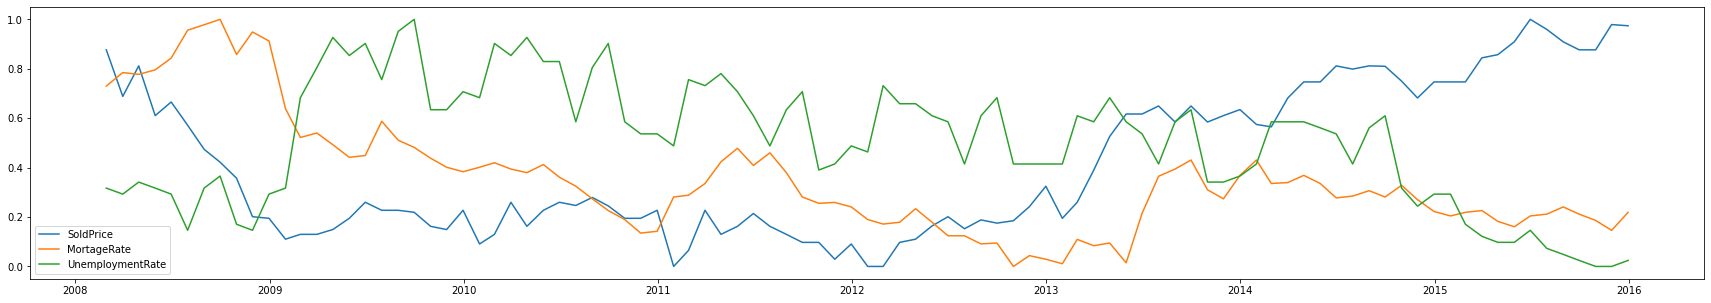

In [13]:
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(111)
#fig = plt.figure(figsize=(30, 5))

ax.plot(df_train_sc.set_index(train['Date']).sold_price, label = 'SoldPrice')
ax.plot(df_train_sc.set_index(train['Date']).MedianMortageRate, label = 'MortageRate')
ax.plot(df_train_sc.set_index(train['Date']).UnemploymentRate, label = 'UnemploymentRate')
ax.legend()
plt.show()

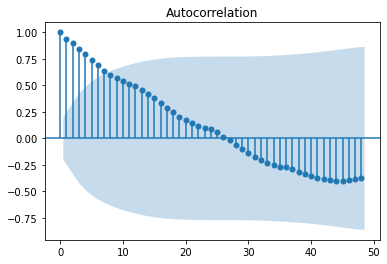

In [14]:
plot_acf(train.sold_price,lags=48) 
plt.show()

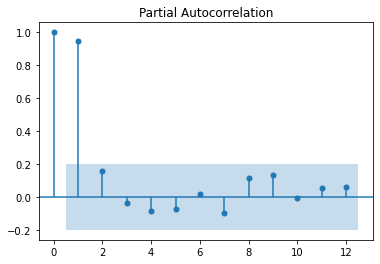

In [12]:
plot_pacf(train.sold_price,lags=12) 
plt.show()

In [15]:
#ADF Fuller test
dftest = adfuller(train.sold_price)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print (dfoutput)

Test Statistic   -0.058792
p-value           0.953391
dtype: float64


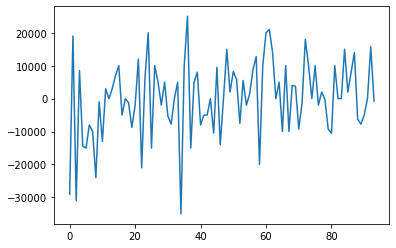

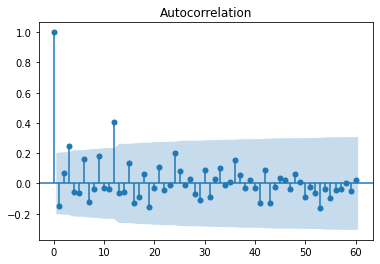

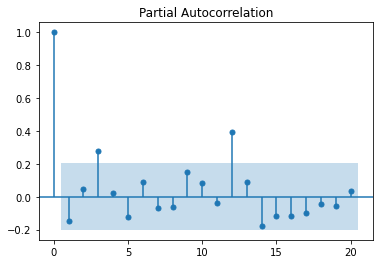

In [16]:
#Differencing
def diff(data, interval=1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return diff

# fit a trend only model 
# determine d
d1 = diff(train.sold_price, 1)
plt.plot(d1)
plot_acf(d1,lags=60) 
plt.show()
plot_pacf(d1,lags=20) 
plt.show()

In [17]:
diff_1 = diff(train.sold_price,interval=1)
dftest = adfuller(diff_1)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic', 'p-value'])
print(dfoutput)

Test Statistic   -3.088139
p-value           0.027443
dtype: float64


In [18]:
def bic_sarimax(data,ex, p_values,d_values,q_values,P_values,Q_values,m, D):
    
    sc1 = MinMaxScaler(feature_range = (0,1))
    sc2 = MinMaxScaler(feature_range = (0,1))
    sc1.fit(data.values.reshape(-1, 1))
    data=sc1.transform(data.values.reshape(-1, 1))
    sc2.fit(ex.values.reshape(-1, 1))
    data=sc2.transform(ex.values.reshape(-1, 1))
    
    best_score, best_order, best_seasonal_order = float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for Q in Q_values:
                        order=(p,d,q)
                        #print(order)
                        #print(seasonal_order)
                        seasonal_order=(P,D,Q,m)
#                         try:
                        res = sm.tsa.statespace.SARIMAX(data,exog=ex,order=order,seasonal_order=seasonal_order,enforce_stationarity=False,enforce_invertibility=False).fit()
                        bic=res.bic
                        #print(bic)
                        if bic < best_score:
                            best_score, best_order, best_seasonal_order=bic, order,seasonal_order
#                         except:
#                             continue
    print((best_score, best_order, best_seasonal_order))

In [19]:
#bic_sarimax(train.iloc[:,1],train.iloc[:,3:4], p_values=range(5),d_values=range(2),q_values=range(3),
           #P_values=range(3),Q_values=range(3),m=12, D=1)

### SARIMAX model:

In [20]:
def evaluate_sarimax_model(data1, data2, trend_order, seasonal_order, split):
    train_size = int(len(data1) * split)
    sc1 = MinMaxScaler(feature_range = (0,1))
    sc2 = MinMaxScaler(feature_range = (0,1))
    
    train_data1, test_data1 = data1[0:train_size], data1.iloc[train_size:]
    train_data2, test_data2 = data2[0:train_size], data2.iloc[train_size:]
    
    
    predictions = list()
    for t in tqdm(range(len(test_data1))):
        
        sc1.fit(train_data1.iloc[:train_size+t].values.reshape(-1, 1))
        sc2.fit(train_data2.iloc[:train_size+t].values)

        data1_sc = sc1.transform(data1[:train_size+t].values.reshape(-1, 1))
        data2_sc = sc2.transform(data2[:train_size+t+1].values)
            
        model = sm.tsa.statespace.SARIMAX(data1_sc,exog=data2_sc[:train_size+t], order=trend_order,seasonal_order=seasonal_order) #rolling forward for one step at each time
        model_fit = model.fit()
        y_hat = np.asanyarray(model_fit.forecast(exog=data2_sc[train_size+t,:]))[0] #predict one step
        y_pred_inv = sc1.inverse_transform(y_hat.reshape(1, -1))[:,0]
        predictions.append(y_pred_inv) #store prediction
    predictions = np.asarray(predictions).reshape(-1,)
    test = np.asanyarray(test_data1).reshape(-1,)
    rmse = np.sqrt(skmetrics.mean_squared_error(test_data1, predictions))
    mape = mean_absolute_percentage_error(test_data1, predictions)
    return rmse, mape

### Model 1: Both exogenous variables

In [21]:
model1 = pm.auto_arima(train_sc[:,0], 
                      exogenous= train_sc[:,1:], 
                      start_p=2, start_q=0,
                      p=0, max_q=5, # maximum p and q
                      m=12,              # seasonal is set to False
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, start_Q=0,
                      max_P=3, max_Q=3,
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-34.583, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-189.132, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-90.183, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-24.494, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-189.480, Time=0.19 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-190.338, Time=0.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-186.548, Time=0.47 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-192.366, Time=0.78 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=-189.139, Time=0.61 sec
 ARIMA(1,0,0)(0,1,3)[12] intercept   : AIC=-190.065, Time=1.23 sec
 ARIMA(1,0,0)(1,1,3)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC

In [22]:
y_pred = model1.predict(n_periods=len(test_sc),X=test_sc[:,1:]).reshape(-1,1)
y_pred_ = np.repeat(y_pred,3,axis=1) # duplicate the pred column x3 times to fit the scaler's shape
y_pred_inv = sc.inverse_transform(y_pred_)[:,0]# inverset the pred and take the first column (gdp)

In [23]:
mape_test_sarimax=(np.abs(np.array(test['sold_price'])-np.array(y_pred_inv))/np.array(test['sold_price'])).mean()
print(mape_test_sarimax)

0.019976267076426874


In [24]:
np.sqrt(skmetrics.mean_squared_error(test['sold_price'], np.array(y_pred_inv)))

11887.715692212629

In [25]:
trend_order = (2,1,0)
seasonal_order= (0,0,0,0)
rmse1, mape1 = evaluate_sarimax_model(train.iloc[:,1],train.iloc[:,3:4], trend_order, seasonal_order, split=0.67)

100%|██████████| 32/32 [00:01<00:00, 18.15it/s]


In [26]:
rmse1

8838.740833148922

### Model 2: Only Median Mortgage Rate

In [27]:
model2 = pm.auto_arima(train_sc[:,0], 
                      exogenous= train_sc[:,1:2], 
                      start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=12,              # seasonal is set to False
                      d=1,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, start_Q=0,
                      max_P=3, max_Q=3,
                      max_D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-215.475, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-239.081, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-233.407, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-217.471, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-215.420, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-237.142, Time=0.35 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-237.170, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-233.959, Time=0.11 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-235.225, Time=0.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-238.215, Time=0.10 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-240.480, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-213.886, Time=0.07 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-238.579, Time=0.44 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-238.619, Time=0.33 sec
 ARIMA(2,1,0)(0,0,1

In [28]:
trend_order = (1,1,2)
seasonal_order= (1,0,0,12)
rmse2, mape2 = evaluate_sarimax_model(train.iloc[:,1],train.iloc[:,2:3], trend_order, seasonal_order, split=0.8)

100%|██████████| 19/19 [00:04<00:00,  4.38it/s]


In [29]:
rmse2

9878.791767151826

In [31]:
np.sqrt(skmetrics.mean_squared_error(test['sold_price'], np.array(y_pred_inv)))

11887.715692212629

### Model 3 : Only Unemployment Rate

In [32]:
model3 = pm.auto_arima(train_sc[:,0], 
                      exogenous= train_sc[:,2:3], 
                      start_p=0, start_q=0,
                      #test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=12,              # seasonal is set to False
                      max_d=2,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, start_Q=0,
                      max_P=4, max_Q=4,
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,information_criterion='oob', n_jobs = -1)

print(model3.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-24.262, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-188.074, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-84.962, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-22.415, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-188.725, Time=0.12 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-189.271, Time=0.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-189.001, Time=0.45 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=-189.191, Time=0.78 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-25.770, Time=0.09 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-192.189, Time=0.41 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=-192.227, Time=0.47 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   :

In [33]:
trend_order = (2,0,0)
seasonal_order= (0,1,1,12)
rmse3, mape3 = evaluate_sarimax_model(train.iloc[:,1],train.iloc[:,3:4], trend_order, seasonal_order, split=0.8)

100%|██████████| 19/19 [00:05<00:00,  3.59it/s]


In [34]:
rmse3

8643.19010569248

In [35]:
pd.DataFrame([[rmse1],[rmse2],[rmse3]],columns=['RMSE'],index=['Both','Mortgage Rate only','Unemployment Rate'])

,RMSE
Both,8838.740833
Mortgage Rate only,9878.791767
Unemployment Rate,8643.190106


In [36]:
test

,Date,sold_price,MedianMortageRate,UnemploymentRate
95,2016-01-31,476250,3.91,5.0
96,2016-02-29,466000,3.96,4.9
97,2016-03-31,485000,3.60,5.0
98,2016-04-30,501000,3.60,5.0
99,2016-05-31,501000,3.59,4.8
100,2016-06-30,505000,3.59,4.8
101,2016-07-31,507000,3.46,4.9
102,2016-08-31,510000,3.46,4.8
103,2016-09-30,510000,3.42,5.0
104,2016-10-31,523000,3.36,5.0


In [37]:
# Final prediction on test set

In [38]:
#test_sc= sc.transform(test)
y_pred = model3.predict(n_periods=len(test_sc),X=test_sc[:,2:]).reshape(-1,1)
y_pred_ = np.repeat(y_pred,3,axis=1) # duplicate the pred column x3 times to fit the scaler's shape
y_pred_inv = sc.inverse_transform(y_pred_)[:,0]# inverset the pred and take the first column (gdp)

In [39]:
y_pred_inv

array([479633.59662586, 483526.69517047, 502237.18540771, 510718.58006233,
       520931.22182967, 529683.95975817, 529705.49862855, 517076.4321487 ,
       518778.73264365, 516045.78781459, 525768.53751657, 523759.89851995])

In [40]:
mape_test_sarimax=(np.abs(np.array(test['sold_price'])-np.array(y_pred_inv))/np.array(test['sold_price'])).mean()
print(mape_test_sarimax)

0.028627863168111636


In [41]:
y_pred_inv

array([479633.59662586, 483526.69517047, 502237.18540771, 510718.58006233,
       520931.22182967, 529683.95975817, 529705.49862855, 517076.4321487 ,
       518778.73264365, 516045.78781459, 525768.53751657, 523759.89851995])

In [42]:
### Final RMSE for SARIMAX

In [43]:
np.sqrt(skmetrics.mean_squared_error(test['sold_price'], np.array(y_pred_inv)))

15779.547043027223

In [44]:
train = df_zillow[df_zillow.Date<'2016-01-31'].copy()
train.tail()

,Date,sold_price,MedianMortageRate,UnemploymentRate
90,2015-08-31,475000.0,3.95,5.2
91,2015-09-30,470000.0,3.87,5.1
92,2015-10-31,470000.0,3.80,5.0
93,2015-11-30,485750.0,3.69,5.0
94,2015-12-31,485000.0,3.89,5.1


In [45]:
y_pred_inv=pd.Series(y_pred_inv)
y_pred_inv.index = test.index

In [46]:
#train.index,len(pd.Series(train[:0]))

In [47]:
train_df=pd.Series(train.iloc[:,1])
train_df.index = train.index

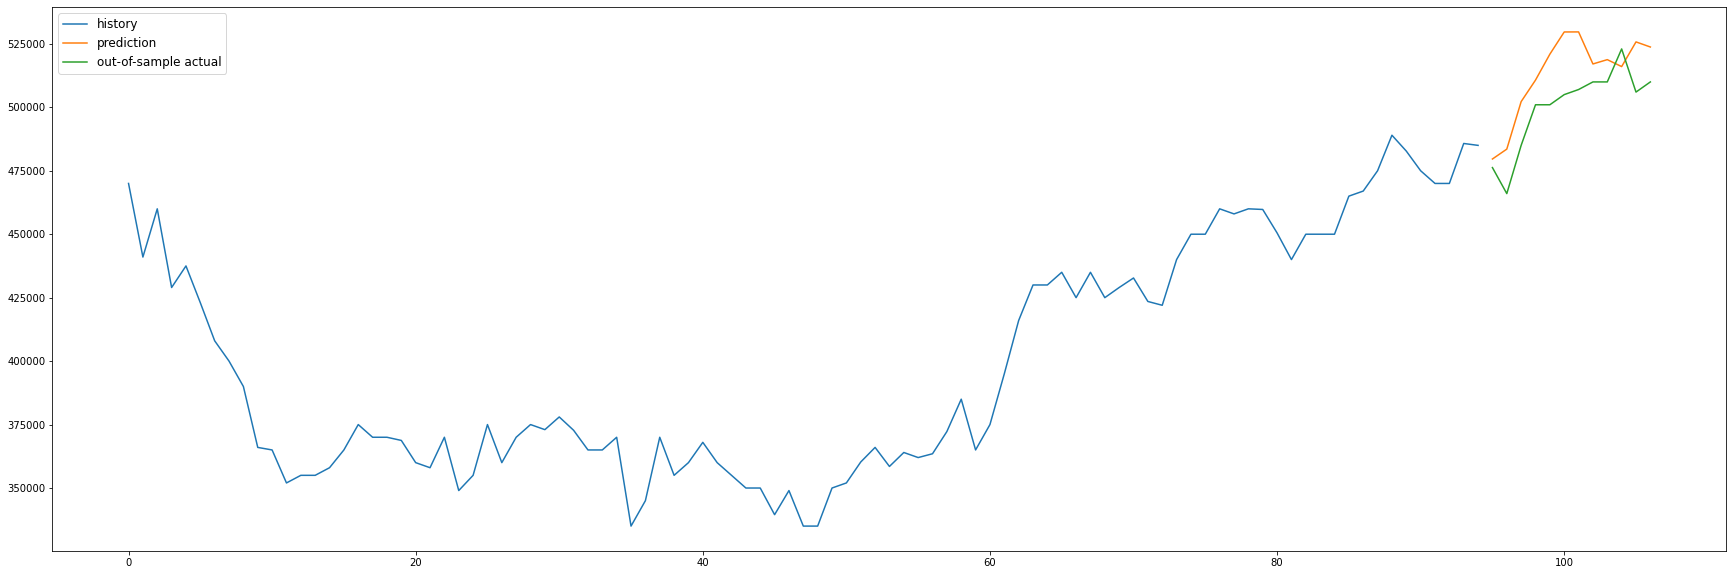

In [48]:
fig = plt.figure(figsize=(30, 10))
plt.plot(train_df, label='history')
plt.plot(y_pred_inv, label='prediction')
plt.plot(test['sold_price'], label='out-of-sample actual')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [49]:
y_pred_inv

95     479633.596626
96     483526.695170
97     502237.185408
98     510718.580062
99     520931.221830
100    529683.959758
101    529705.498629
102    517076.432149
103    518778.732644
104    516045.787815
105    525768.537517
106    523759.898520
dtype: float64

# Code by David Lyu

In [144]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import sklearn.metrics as skmetrics
import warnings
from statsmodels.tsa.stattools import arma_order_select_ic
from tqdm import tqdm #A tqdm progress bar shows you how much time has elapsed and the estimated time remaining for the iterable
import pmdarima as pm

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

warnings.filterwarnings("ignore")

In [145]:
series = pd.read_csv('zillow-carlifornia.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.iloc[:-12,:]
series = series.rename(columns={'MedianSoldPrice_AllHomes.California':'MedianSoldPrice_AllHomes_California'})
series

,MedianSoldPrice_AllHomes_California,MedianMortageRate,UnemploymentRate
Date,,,
2008-02-29,470000.0,5.29,6.3
2008-03-31,441000.0,5.44,6.2
2008-04-30,460000.0,5.42,6.4
2008-05-31,429000.0,5.47,6.3
2008-06-30,437500.0,5.60,6.2
...,...,...,...
2015-08-31,475000.0,3.95,5.2
2015-09-30,470000.0,3.87,5.1
2015-10-31,470000.0,3.80,5.0


In [146]:
series_target = series[['MedianSoldPrice_AllHomes_California']].copy()
series_target

,MedianSoldPrice_AllHomes_California
Date,
2008-02-29,470000.0
2008-03-31,441000.0
2008-04-30,460000.0
2008-05-31,429000.0
2008-06-30,437500.0
...,...
2015-08-31,475000.0
2015-09-30,470000.0
2015-10-31,470000.0


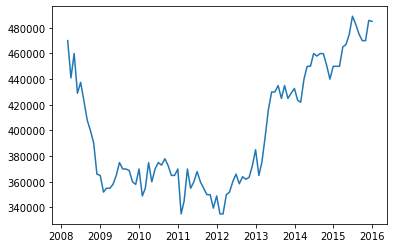

In [147]:
from matplotlib import pyplot
pyplot.plot(series_target)
pyplot.show()

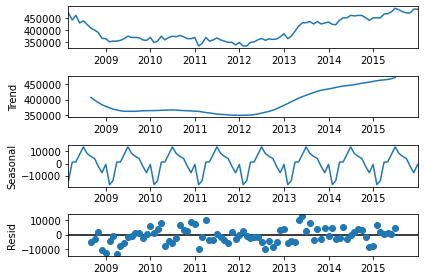

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series_target, model='addictive',freq=12)
result.plot()
plt.show()

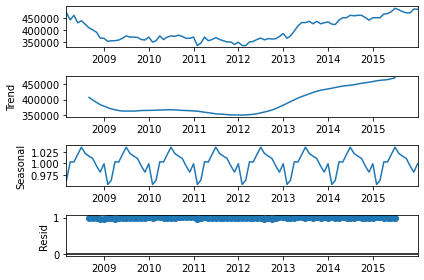

In [149]:
result = seasonal_decompose(series_target, model='multiplicative',freq=12)
result.plot()
plt.show()

In [150]:
# define all the functions we will need 

# trend and seasonal differencing
def diff(data, interval=1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return diff
#trend differencing once: interval=1
#trend differencing twice: d1=diff(data, interval=1); d2=diff(d1 interval=1)
#seasonal differencing: interval=m

#Define ADF test
#Perform from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#[OPTIONAL]grid order search based on BIC
#auto-arima order selection in pmdarima
#if the function doesn't work, you can write one yourself: 

def bic_sarima(data, p_values,d_values,q_values,P_values,Q_values,m, D=1):
    best_score, best_order, best_seasonal_order = float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for Q in Q_values:
                        order=(p,d,q)
                        seasonal_order=(P,D,Q,m)
#                         try:
                        res = sm.tsa.statespace.SARIMAX(data,order=order,seasonal_order=seasonal_order,enforce_stationarity=False,enforce_invertibility=False).fit()
                        bic=res.bic
                        if bic < best_score:
                            best_score, best_order, best_seasonal_order=bic, order,seasonal_order
#                         except:
#                             continue
    print((best_score, best_order, best_seasonal_order))
    

# define evaluation metrics for model selection based on one-step forward cross validation
def evaluate_sarima_model(X, trend_order, seasonal_order):
    train_size = int(len(X) * 0.67)
    train, test = X[0:train_size], X[train_size:]
    
    predictions = list()
    for t in tqdm(range(len(test))):
        model = sm.tsa.statespace.SARIMAX(X[:train_size+t], order=trend_order,seasonal_order=seasonal_order) #rolling forward for one step at each time
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast())[0] #predict one step
        predictions.append(yhat) #store prediction
        # calculate out of sample error
    predictions = np.asarray(predictions).reshape(-1,)
    test = np.asanyarray(test).reshape(-1,)
    mae = skmetrics.mean_absolute_error(test, predictions)
    rmse = np.sqrt(skmetrics.mean_squared_error(test, predictions))
    mape = np.mean(np.abs(test-predictions)/test)
    return rmse, mae, mape

def evaluate_sarima_model_80(X, trend_order, seasonal_order):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    
    predictions = list()
    for t in tqdm(range(len(test))):
        model = sm.tsa.statespace.SARIMAX(X[:train_size+t], order=trend_order,seasonal_order=seasonal_order) #rolling forward for one step at each time
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast())[0] #predict one step
        predictions.append(yhat) #store prediction
        # calculate out of sample error
    predictions = np.asarray(predictions).reshape(-1,)
    test = np.asanyarray(test).reshape(-1,)
#     mae = skmetrics.mean_absolute_error(test, predictions)
    rmse = np.sqrt(skmetrics.mean_squared_error(test, predictions))
#     mape = np.mean(np.abs(test-predictions)/test)
    return rmse

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -3.088139
p-value                         0.027443
#Lags Used                     11.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


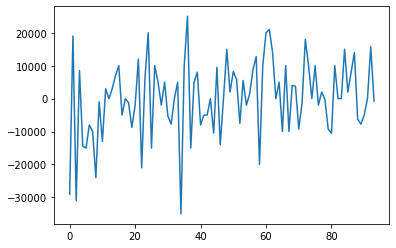

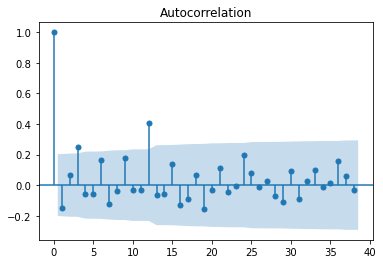

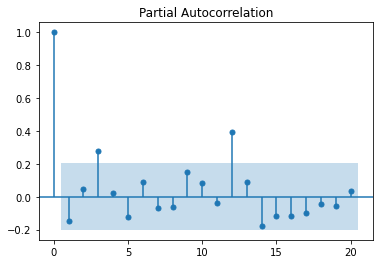

In [151]:
# fit a trend only model d=1
d1 = diff(series_target.MedianSoldPrice_AllHomes_California, 1)
adf_test(d1)
plt.plot(d1)
plot_acf(d1,lags=38) 
plt.show()
plot_pacf(d1,lags=20) 
plt.show()

Results of Augmented Dickey-Fuller Test:
Test Statistic                -7.390432e+00
p-value                        8.027576e-11
#Lags Used                     1.000000e+01
Number of Observations Used    8.200000e+01
Critical Value (1%)           -3.512738e+00
Critical Value (5%)           -2.897490e+00
Critical Value (10%)          -2.585949e+00
dtype: float64


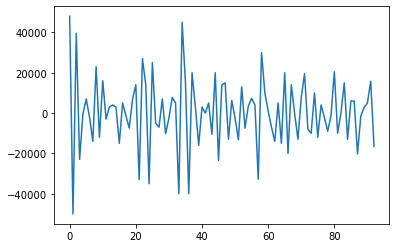

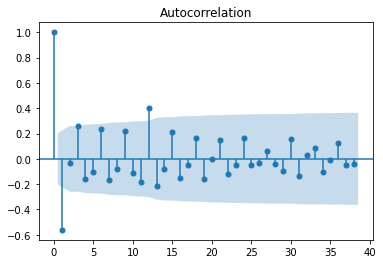

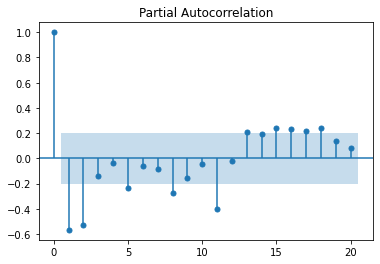

In [152]:
# fit a trend only model d=2
d2 = diff(d1, 1)
adf_test(d2)
plt.plot(d2)
plot_acf(d2,lags=38) 
plt.show()
plot_pacf(d2,lags=20) 
plt.show()

In [153]:
arma_order_select_ic(d1,max_ar=4, max_ma=4, ic='bic')

{'bic':              0            1            2            3            4
 0  2033.963390  2036.631456  2038.201996  2038.727602  2042.965276
 1  2036.256549  2041.742346  2045.028803  2043.015434  2046.380362
 2  2040.525759  2044.825265  2049.910411  2043.252820  2050.044835
 3  2037.595601  2042.138387  2058.399309  2045.331430  2058.778148
 4  2042.137814  2047.149872          NaN          NaN          NaN,
 'bic_min_order': (0, 0)}

In [154]:
arma_order_select_ic(d2,max_ar=4, max_ma=4, ic='bic')

{'bic':              0            1            2            3            4
 0  2087.961822  2016.294028  2016.841843  2019.669593  2021.355711
 1  2053.268684  2016.484131  2023.931164  2025.907583  2025.332262
 2  2027.415477  2020.979058  2024.497709  2019.411019  2023.938431
 3  2029.951875  2033.511225  2024.738814          NaN          NaN
 4  2034.266556  2024.635002  2027.482973          NaN          NaN,
 'bic_min_order': (0, 1)}

In [155]:
bic_sarima(series_target.MedianSoldPrice_AllHomes_California, p_values=range(4),d_values=range(3),q_values=range(4),
           P_values=range(3),Q_values=range(3),m=12, D=1)

(16.029332740929885, (0, 2, 1), (0, 1, 2, 12))


In [156]:
rmse_sarima1 = evaluate_sarima_model_80(series_target.MedianSoldPrice_AllHomes_California, (0, 1, 0), (0, 0, 0, 0))
rmse_sarima2 = evaluate_sarima_model_80(series_target.MedianSoldPrice_AllHomes_California, (0, 2, 1), (0, 0, 0, 0))
rmse_sarima3 = evaluate_sarima_model_80(series_target.MedianSoldPrice_AllHomes_California, (0, 2, 1), (0, 1, 2, 12))

rmse_sarima1, rmse_sarima2, rmse_sarima3

100%|██████████| 19/19 [00:02<00:00,  8.45it/s]


(8161.607813737632, 10323.72403990903, 12598.932484051415)

In [157]:
series_prophet = series_target.copy()
series_prophet.reset_index(inplace=True)
series_prophet = series_prophet.rename(columns={'Date':'ds','MedianSoldPrice_AllHomes_California':'y'})

train_size = int(len(series_prophet) * 0.8)
series_prophet_train, series_prophet_test = series_prophet[0:train_size], series_prophet[train_size:]

In [158]:
train_size

76

In [159]:
model_prophet=Prophet()
#model_2=model_prophet.add_seasonality(name='yearly', period=12, fourier_order=5,)
model_prophet.fit(series_prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [160]:
future = model_prophet.make_future_dataframe(periods=len(series_prophet_test))
forecast = model_prophet.predict(future)

In [161]:
series_prophet

,ds,y
0,2008-02-29,470000.0
1,2008-03-31,441000.0
2,2008-04-30,460000.0
3,2008-05-31,429000.0
4,2008-06-30,437500.0
...,...,...
90,2015-08-31,475000.0
91,2015-09-30,470000.0
92,2015-10-31,470000.0
93,2015-11-30,485750.0


In [162]:
pred = [forecast["yhat"][76:], series_prophet_test.ds]
headers = ["y", "ds"]
pred = pd.concat(pred, axis=1, keys=headers)
pred.head()

,y,ds
76,461036.085763,2014-06-30
77,462027.666789,2014-07-31
78,463567.915155,2014-08-31
79,465569.909695,2014-09-30
80,467939.008944,2014-10-31


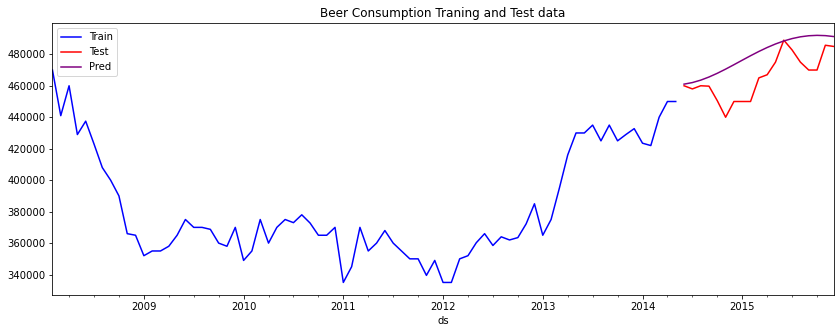

In [163]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
series_prophet_train.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
series_prophet_test.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
pred.plot(kind='line', x='ds', y='y', color='purple', label='Pred', ax=ax)
plt.title('Beer Consumption Traning and Test data')
plt.show()

In [164]:
rmse_prophet = np.sqrt(skmetrics.mean_squared_error(series_prophet_test.y, pred.y))
rmse_prophet

16936.787904798177

In [165]:
# rmse_sarima1 = evaluate_sarima_model_80(series_target.MedianSoldPrice_AllHomes_California, (0, 1, 0), (0, 0, 0, 0))
# rmse_sarima2 = evaluate_sarima_model_80(series_target.MedianSoldPrice_AllHomes_California, (0, 2, 1), (0, 0, 0, 0))
# rmse_sarima3 = evaluate_sarima_model_80(series_target.MedianSoldPrice_AllHomes_California, (0, 2, 1), (0, 1, 2, 12))

rmse_sarima1, rmse_sarima2, rmse_sarima3

(8161.607813737632, 10323.72403990903, 12598.932484051415)

- ARIMA(0, 1, 0) performs best so far

- Test the ARIMA(0, 1, 0) further by comparing 0.8CV and 1-step CV, alse make plots

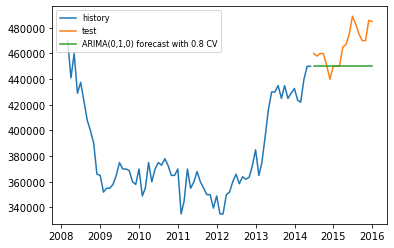

In [166]:
# 0.8 CV instead of one-step CV for ARIMA(0, 1, 0)
split = int(len(series_target.MedianSoldPrice_AllHomes_California)* 0.8)
train= series_target.MedianSoldPrice_AllHomes_California[0:split] 
test_1=series_target.MedianSoldPrice_AllHomes_California[split:]

mod = sm.tsa.statespace.SARIMAX(train,order=(0,1,0),seasonal_order=(0,0,0,0))
res = mod.fit()
pred = res.predict(start=len(train), end=len(train)+len(test_1)-1)

rmse_1 = np.sqrt(skmetrics.mean_squared_error(test_1, pred))

plt.plot(train, label='history')
plt.plot(test_1, label='test')
plt.plot(pred, label='ARIMA(0,1,0) forecast with 0.8 CV')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [167]:
rmse_1

20672.81140964981

In [168]:
# One step CV
X = series_target.MedianSoldPrice_AllHomes_California
train_size = int(len(X) * 0.8)
train, test = X[0:train_size], X[train_size:]

predictions = list()
for t in tqdm(range(len(test))):
    model = sm.tsa.statespace.SARIMAX(X[:train_size+t], order=(0,1,0),seasonal_order=(0,0,0,0))
    model_fit = model.fit()
    yhat = np.asanyarray(model_fit.forecast())[0] #predict one step
    predictions.append(yhat) #store prediction
    # calculate out of sample error
predictions = np.asarray(predictions).reshape(-1,)

predictions_1step = pd.Series(predictions, index=test.index)

rmse_1 = np.sqrt(skmetrics.mean_squared_error(test, predictions_1step))

100%|██████████| 19/19 [00:00<00:00, 40.22it/s]


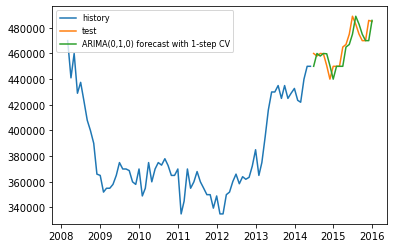

In [169]:
plt.plot(train, label='history')
plt.plot(test, label='test')
plt.plot(predictions_1step, label='ARIMA(0,1,0) forecast with 1-step CV')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [170]:
rmse_1

8161.607813737632